## Homework 2 

### Template for Gradient Descent Using Python and AD (automatic differentiation)

### Before start, make sure you have configured python environment and have PyTorch, Numpy package installed.

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### 从 xy_train.csv 中读取训练数据

In [4]:
def my_GD(data, params, loss, eps = 0.1, max_iter = 1e4, ls_alpha = 0.01, ls_beta = 0.5):
    obj_all = []
    params_all = []
    params_all.append(params.data.cpu().numpy())
    for i in range(int(max_iter)):
        # calculate the loss
        obj = loss(data, params)
        obj_all.append(obj.data)
        obj.backward()
        
        grad_norm = torch.norm(params.grad)
        print("iter:", i, "obj:", obj.data, "grad_norm:", grad_norm)
        if grad_norm < eps:
            return params, obj_all, params_all
        
        ## backtracking line search
        t0 = 1
        while True:
            params_new = params.data - t0 * params.grad
            if loss(data, params_new) <= (obj - ls_alpha * t0 * params.grad.norm()):
                params.data = params_new
                break
            t0 *= ls_beta
        
        params_all.append(params.data.cpu().numpy())
        params.grad.data.zero_()
        
    return params, obj_all, params_all

## Rosenbrock 函数优化

#### the global minimum for the Rosenbrock function is (1,1)

![Contour plot for the Rosenbrock function](https://upload.wikimedia.org/wikipedia/commons/d/d9/Rosenbrock_contour.svg)

iter: 0 obj: tensor(62.5000) grad_norm: tensor(479.0877)
iter: 1 obj: tensor(32.5343) grad_norm: tensor(244.8865)
iter: 2 obj: tensor(5.6907) grad_norm: tensor(44.1462)
iter: 3 obj: tensor(5.1596) grad_norm: tensor(18.7967)
iter: 4 obj: tensor(5.0510) grad_norm: tensor(7.4802)
iter: 5 obj: tensor(5.0328) grad_norm: tensor(3.3833)
iter: 6 obj: tensor(5.0275) grad_norm: tensor(2.0403)
iter: 7 obj: tensor(4.8020) grad_norm: tensor(58.7785)
iter: 8 obj: tensor(1.7342) grad_norm: tensor(39.7673)
iter: 9 obj: tensor(1.4068) grad_norm: tensor(31.2921)
iter: 10 obj: tensor(0.7078) grad_norm: tensor(22.1998)
iter: 11 obj: tensor(0.5436) grad_norm: tensor(17.1487)
iter: 12 obj: tensor(0.3652) grad_norm: tensor(12.5861)
iter: 13 obj: tensor(0.3031) grad_norm: tensor(9.7022)
iter: 14 obj: tensor(0.2518) grad_norm: tensor(7.3041)
iter: 15 obj: tensor(0.2291) grad_norm: tensor(5.6688)
iter: 16 obj: tensor(0.2124) grad_norm: tensor(4.3613)
iter: 17 obj: tensor(0.2035) grad_norm: tensor(3.4280)
iter: 

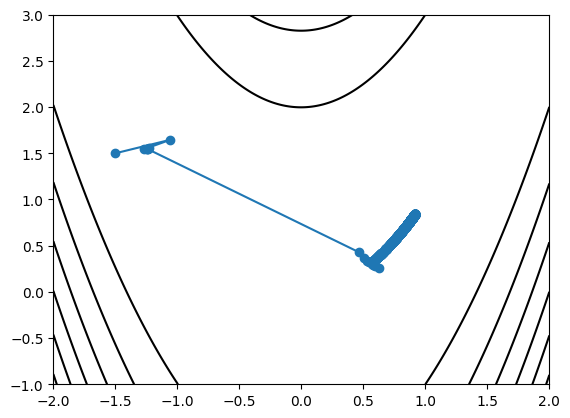

In [5]:
def loss(data, params):
    return (1 - params[0])**2 + 100 * (params[1] - params[0]**2)**2

## choose the initial parameters
params = torch.tensor([-1.5, 1.5], requires_grad=True)

## run the gradient descent algorithm
## there is no data in this objective function, so we just pass in a dummy variable _
beta_est, obj_all, params_all = my_GD(_, params, loss)

## plot the objective function
x = np.linspace(-2, 2, 1000)
y = np.linspace(-1, 3, 1000)

X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2
plt.contour(X, Y, Z, colors='black');
params_all = np.array(params_all)
plt.plot(params_all[:,0],params_all[:,1], '-o')
plt.xlim(-2, 2)
plt.ylim(-1, 3)
print("The true minimizer is:", [1, 1])
print("The estimated minimizer is:", beta_est)

## Beale 函数

#### The true value is (3, 0.5) for the Beale function

![Contour plot for the Beale's function](https://upload.wikimedia.org/wikipedia/commons/3/3e/Beale_contour.svg)

iter: 0 obj: tensor(579.7031) grad_norm: tensor(1868.0686)
iter: 1 obj: tensor(2.5564) grad_norm: tensor(7.3093)
iter: 2 obj: tensor(2.0275) grad_norm: tensor(6.2270)
iter: 3 obj: tensor(1.4242) grad_norm: tensor(6.2694)
iter: 4 obj: tensor(0.5060) grad_norm: tensor(1.7092)
iter: 5 obj: tensor(0.3201) grad_norm: tensor(1.5396)
iter: 6 obj: tensor(0.2666) grad_norm: tensor(1.8213)
iter: 7 obj: tensor(0.1632) grad_norm: tensor(0.7131)
iter: 8 obj: tensor(0.1351) grad_norm: tensor(1.5988)
iter: 9 obj: tensor(0.0854) grad_norm: tensor(0.8872)
iter: 10 obj: tensor(0.0713) grad_norm: tensor(0.6270)
iter: 11 obj: tensor(0.0613) grad_norm: tensor(0.4657)
iter: 12 obj: tensor(0.0544) grad_norm: tensor(0.3825)
iter: 13 obj: tensor(0.0510) grad_norm: tensor(0.7113)
iter: 14 obj: tensor(0.0453) grad_norm: tensor(0.6027)
iter: 15 obj: tensor(0.0401) grad_norm: tensor(0.5196)
iter: 16 obj: tensor(0.0365) grad_norm: tensor(0.4690)
iter: 17 obj: tensor(0.0331) grad_norm: tensor(0.4321)
iter: 18 obj: t

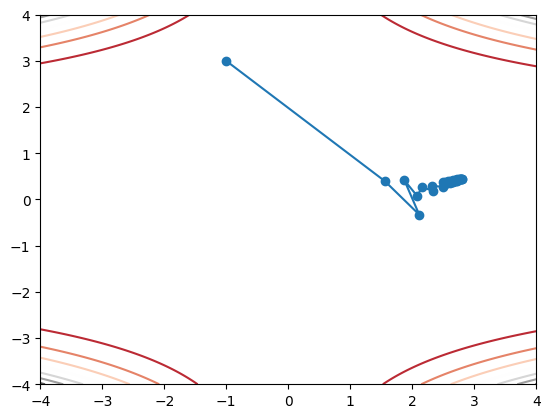

In [6]:
## loss function for the Beale function
def loss(data, params):
    return (1.5 - params[0] + params[0] * params[1])**2 + (2.25 - params[0] + params[0] * params[1]**2)**2 + (2.625 - params[0] + params[0] * params[1]**3)**2

## choose the initial parameters
params = torch.tensor([-1.0, 3.0], requires_grad=True)

## run the gradient descent algorithm
## there is no data in this objective function, so we just pass in a dummy variable _
beta_est, obj_all, params_all = my_GD(_, params, loss)


## plot the objective function
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)

X, Y = np.meshgrid(x, y)
Z = (1.5 - X + X * Y)**2 + (2.25 - X + X * Y**2)**2 + (2.625 - X + X * Y**3)**2
plt.contour(X, Y, Z, cmap='RdGy');
params_all = np.array(params_all)
plt.plot(params_all[:,0],params_all[:,1], '-o')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
print("The true minimizer is:", [3, 0.5])
print("The estimated minimizer is:", beta_est)

## 线性回归问题
$$
\min_{\beta\in\mathbb{R}^p} \frac{1}{2n}\sum_{i=1}^n(y_i-\beta^\top x_i)^2.
$$

In [ ]:
## Define the loss function of linear regression
def loss(data, beta):
    X = data['X']
    y = data['y']
    return 0.5 * torch.mean((y - torch.mv(X, beta))**2)

n = 100
p = 15

# Generate data.
torch.manual_seed(123)
X = torch.randn(n, p)
y = torch.randn(n)
data = {'X': X, 'y': y}

## initialize the parameter variables
## and fit the data to the model
params = torch.ones(p, requires_grad=True)
beta_est, obj_all, _ = my_GD(data, params, loss, eps=0.01)

beta_explicit = torch.inverse(X.T@X)@X.T@y
plt.plot(obj_all)
plt.axhline(y = loss(data, beta_explicit), color = 'r', linestyle = '--')

## create a table to compare the results
res_compare = pd.DataFrame({'beta_true': beta_explicit.data.numpy(),
                            'beta_est': beta_est.data.numpy()})
res_compare

## 逻辑回归问题
$$
\min_{\beta\in\mathbb{R}^p} -\frac{1}{n}\sum_{i=1}^n\left[ y_i \beta^\top x_i - \log (1+\exp(\beta^\top x_i))\right].
$$

In [ ]:
## Define the loss function of logistic regression
def logistic_loss(data, beta):
    X = data['X']
    y = data['y']
    return -torch.mean(y * (X @ beta) - torch.log(1 + torch.exp(X @ beta)))

n = 1000
p = 10

# Generate data.
torch.manual_seed(123)
X = torch.randn(n, p)
## add the intercept
X[:,0] = 1
beta_true = torch.randn(p)
y = torch.distributions.Bernoulli(logits = X @ beta_true).sample()
data = {'X': X, 'y': y}

## initialize the parameter variables
## and fit the data to the model
params = torch.ones(p, requires_grad=True)
beta_est, obj_all, _ = my_GD(data, params, logistic_loss, eps=1e-3, ls_alpha=1e-4)
plt.plot(obj_all)

## compare it with the logistic regression implementation in sklearn
## install sklearn package if you don't have it
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
logistic_res = model.fit(X[:,1:], y)
coefficients = model.coef_
intercept = model.intercept_

## not to use scientific notation
np.set_printoptions(suppress=True)
## create a table to compare the results
res_compare = pd.DataFrame({'true': beta_true, 
                            'estimated': beta_est.data.cpu().numpy(),
                            'sklearn': np.append(intercept, coefficients)})
res_compare